# Playground

This notebook is designed to explore the functionalities of `eos694w`. Ensure you have everything set up before you proceed.


### Prerequiste

To execute this notebook on your local machine, make sure you have the following installed:

1. Python 3.10 or higher
2. Git
3. [Optional] Tools for managing environments (we’re using conda in this case)
   
### Step 1: Create a virtual environment

You’re free to use any tool for environment management. In this case, we’re using `conda`. To create an environment, execute the following command:


```bash
conda env create -f env.yml
```

You’ll find a file named env.yml in the root directory. This file contains all the necessary dependencies required for this project.

### Step 2: Activate

Now that we have created our virtual environment, we can activate it using the following command.

```bash
conda activate eos694w
```

> Note the above command will only work if you have used `conda` to create your virtual environment



In [1]:
import os

from utils import visualize_random_output_molecules

try: ipynb_path
except NameError: ipynb_path = os.getcwd()

root = os.path.abspath(os.path.join(ipynb_path, '..'))
notebook = os.path.join(root, 'notebook')


# Input smiles path
input_smiles = os.path.join(notebook, 'input', 'quintozene.smi')
output_smiles = os.path.join(notebook, 'output', 'quintozene.smi')

In [19]:
# Running the model to generate new smiles simliar to the provided smiles.

!python {root}/model/framework/code/main.py {input_smiles} {output_smiles} True

Starting sampling at 2024-02-25 16:05:38
Total input smiles: 1
Time taken in seconds: 29
Removing O=[N+]([O-])c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl, as it is a duplicate entry.
Total unique smiles generated: 89, Expected: 100, Loss: 11


[16:06:08] non-ring atom 13 marked aromatic
[16:06:08] non-ring atom 13 marked aromatic
[16:06:08] non-ring atom 13 marked aromatic


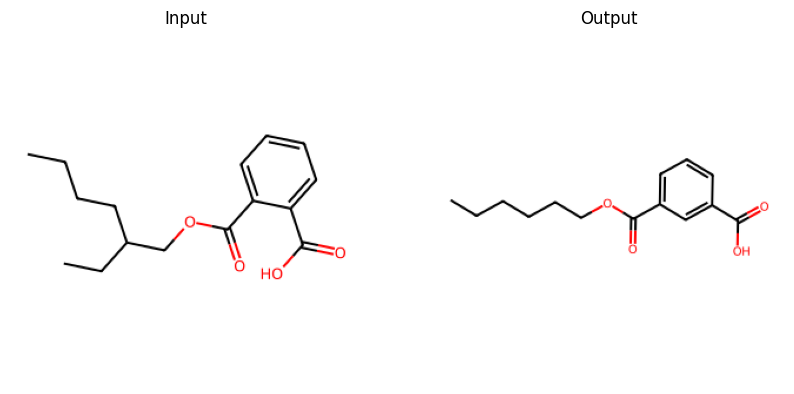

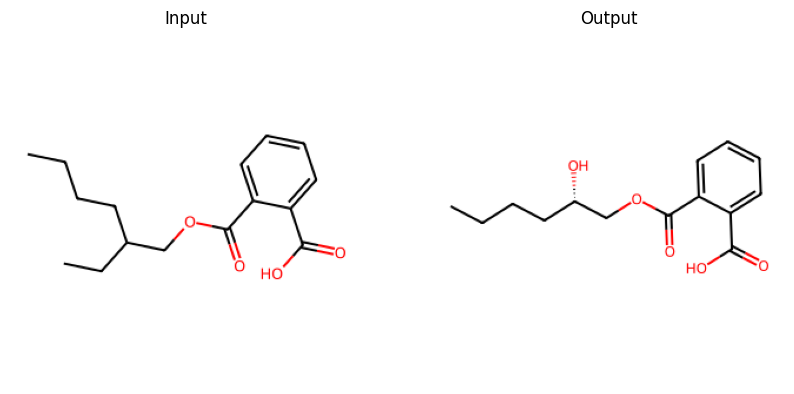

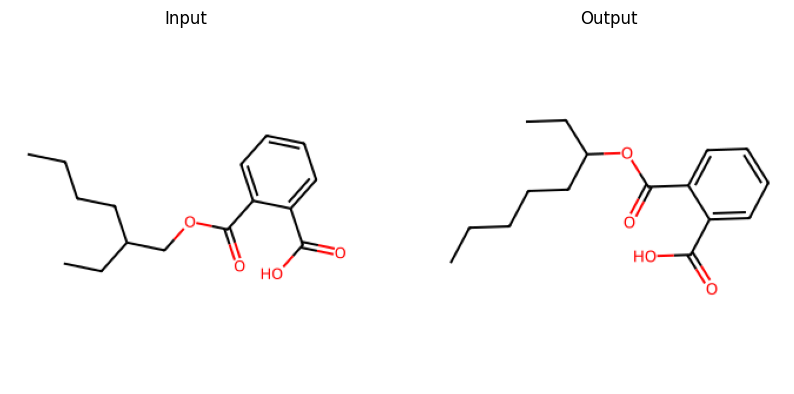

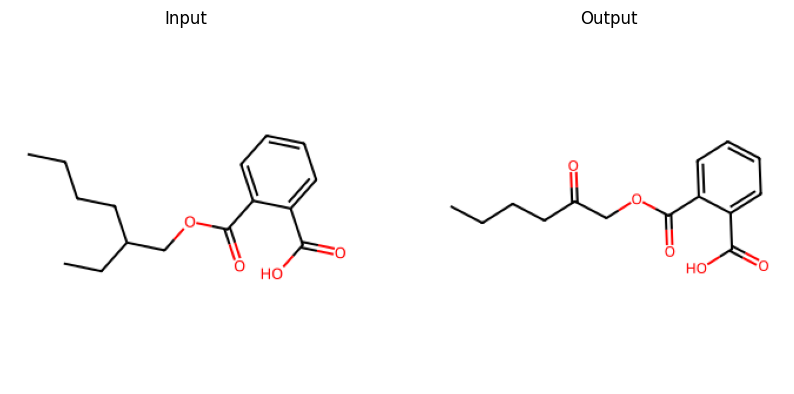

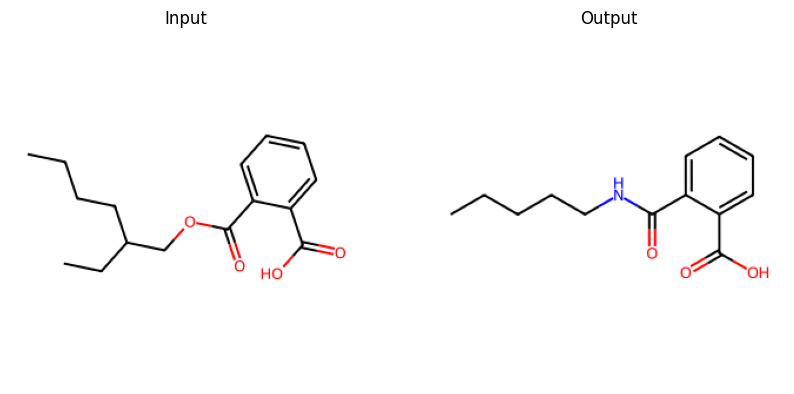

In [2]:
visualize_random_output_molecules(output_smiles)

In [9]:
import numpy as np

In [11]:
scores = [0.05, 100, None, 100.89, 0.98]

In [16]:
 _scores=list(map(lambda x: -1 if not isinstance(x, (int, float)) else x, scores))

In [17]:
_scores

[0.05, 100, -1, 100.89, 0.98]